# Стратегия взаимодействия с клиентами фитнес-центра

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. **Наша цель — провести анализ и подготовить план действий по удержанию клиентов.**
А именно:
- прогноз вероятности оттока (на уровне следующего месяца) для каждого клиента;
- формирование типичных портретов клиентов: выделение нескольких наиболее ярких групп и характеритика их основных свойств;
- анализ основных признаков, наиболее сильно влияющих на отток;
- формулирование основных выводов и разработка рекомендаций по повышению качества работы с клиентами:
	1) выделение целевых групп клиентов;
	2) предложение меры по снижению оттока;
	3) определение других особенностей взаимодействия с клиентами.


Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. **Исходные данные:**
1. Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
2. Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

Для достижения цели решим следующие **задачи:**
1. Загрузка данных.
2. Исследовательский анализ данных.
3. Построение модели прогнозирования оттока клиентов
4. Кластеризация клиентов.
5. Напишем общий вывод.

**СОДЕРЖАНИЕ**
1. [Загрузка данных](#1)
2. [Исследовательский анализ данных](#2)
3. [Модель прогнозирования оттока клиентов](#3)
4. [Кластеризация клиентов](#4)
5. [Общий вывод](#5)

### Загрузка данных
<a id="1"></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

**Загрузим данные:**

In [ ]:
try:
    df = (pd.read_csv('/datasets/gym_churn.csv'))
except:
    df = (pd.read_csv('gym_churn.csv'))

**Посмотрим на датасет:**

In [ ]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
df.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [ ]:
df.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2742,0,1,0,1,1,1,1,31,198.103938,1.0,2,2.487512,2.450972,0
197,1,1,0,0,1,1,0,27,184.172449,1.0,2,1.381842,1.588576,1
2075,0,1,1,0,1,1,1,25,70.929766,1.0,1,1.335421,0.064566,1
1336,0,1,1,0,1,1,0,25,50.360424,1.0,2,1.370198,0.671450,1
809,0,1,0,0,0,1,0,28,214.329956,1.0,14,3.700020,3.610445,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

**Промежуточный вывод 1:**

Датасет состоит из следующих столбцов:
- 'gender' — пол;
- 'near_location' — проживание или работа в районе, где находится фитнес-центр;
- 'partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'phone' — наличие контактного телефона;
- 'contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'group_visits' — факт посещения групповых занятий;
- 'age' — возраст;
- 'avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
- 'month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);
- 'avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'churn' — факт оттока в текущем месяце.

Всего в датасете 14 столбцов и 4000 строк. Наименования столбцов привели в соответствии с хорошим стилем к нижнему регистру. Типы данных в столбцах: 'gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn' стоит изменить на bool. Уже заметно, что пропусков в данных нет.

### Исследовательский анализ данных
<a id="2"></a>

####  Посмотрим на датасет: есть ли в нём отсутствующие значения (пропуски), изучим средние значения и стандартные отклонения

In [ ]:
print('----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------')
display(df.describe().T)
print('----------------------------------------ПРОПУСКИ-----------------------------------------------------')
print(df.isna().sum())
print('----------------------------------------ДУБЛИКАТЫ----------------------------------------------------')
print(df.duplicated().sum())

----------------------------СРЕДНИЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ------------------------------------


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


----------------------------------------ПРОПУСКИ-----------------------------------------------------
gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64
----------------------------------------ДУБЛИКАТЫ----------------------------------------------------
0


По средним статистическим характеристикам видно, что:
- Распределение по возрасту почти равномерное
- Клиенты в среднем живут около клуба
- Чуть меньше половины клиентов в среднем являются партнерами фитнес-клуба
- В среднем 1/3 клиентов пришла по акции "Приведи друга"
- В среднем в базе есть номера 90% клиентов
- Средний период контракта 4.6 месяцев
- В среднем 41% клиентов посещают групповые занятия
- Средний возраст 29 лет
- Суммарная средняя выручка от других услуг фитнес-центра: 146
- Контракты в среднем истекают через 4.3 месяца
- Средняя продолжительность посещения фитнес-клуба 3.7 месяцев
- Средняя частота посещений в неделю за все время с начала действия абонемента почти 2 раза
- Средняя частота посещений в неделю за предыдущий месяц почти 2 раза
- В среднем отток клиентов равен 0.27

**Пропусков и дубликатов нет. Изменим тип данных в столбцах: 'gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn' на bool:**

In [ ]:
df[['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']] = \
            df[['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']].astype('bool')

**Посмотрим на уникальные значения в столбце 'month_to_end_contract':**

In [ ]:
df['month_to_end_contract'].unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

**Столбец содержит целочисленные значения. Изменим тип данных на int:**

In [ ]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [ ]:
df.groupby('churn').mean().T

churn,False,True
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


По средним значениям признаков в двух группах - тех, кто ушел в отток и тех, кто остался
- Распределение по полу различаются не существенно, поэтому не влияют на отток.
- Те, кто живёт рядом меньше попадает в отток.
- "Партнеры" меньше перестают посещать клуб.
- "Приведи друга" меньше перестают посещать клуб также
- Отсутствие телефона не сказывается на оттоке, потому что 90% клиентов ушедших и оставшихся оставили свой номер телефона
- Клиенты в оттоке уходят через месяц после первого месяца посещения спортзала
- Пользователи в оттоке меньше посещают групповые занятия
- Пользователю в оттоке в среднем 27 лет
- Пользователи в оттоке меньше пользуются дополнительными услугами
- У пользователей в оттоке меньше времени по контракту
- Средняя продолжительность посещения пользователей в оттоке около 1 месяца
- За всё время пользователи в оттоке меньше посещают зал в среднем за неделю
- За месяц (в среднем за неделю) пользователи в оттоке посещают зал 1 раз в неделю

#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

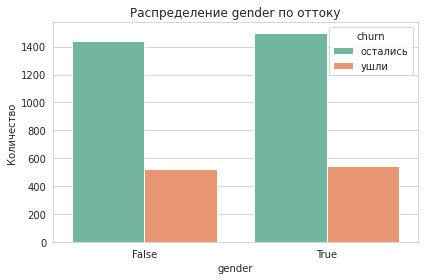

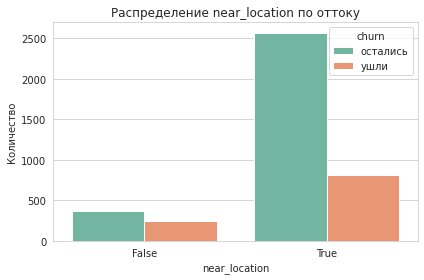

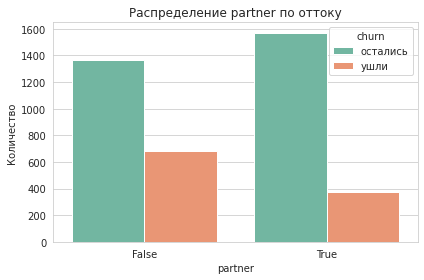

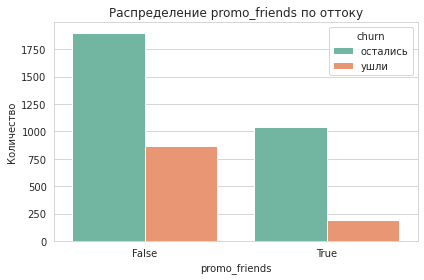

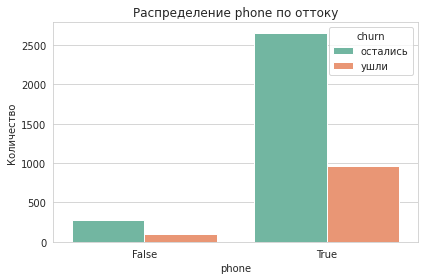

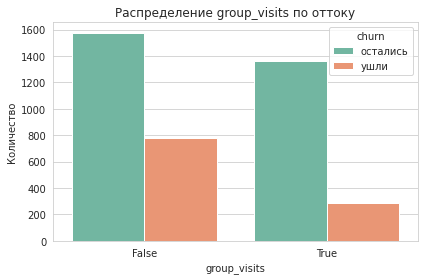

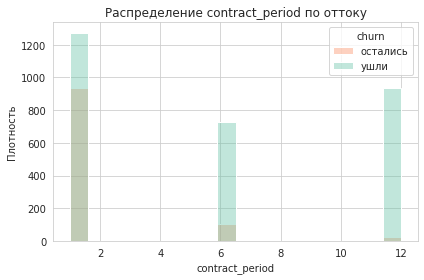

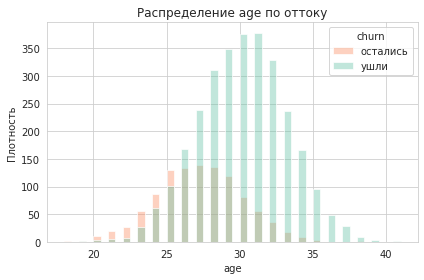

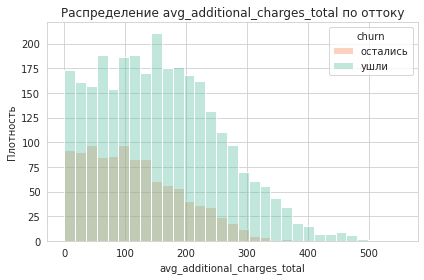

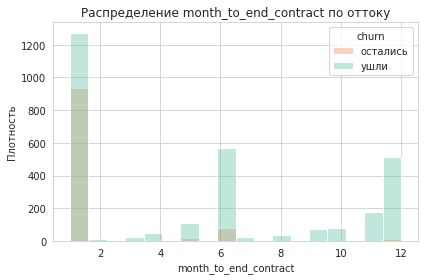

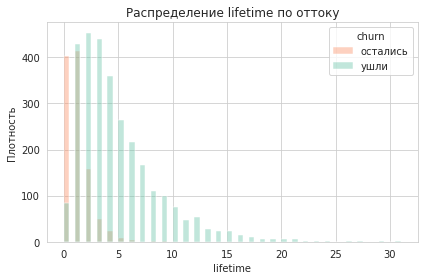

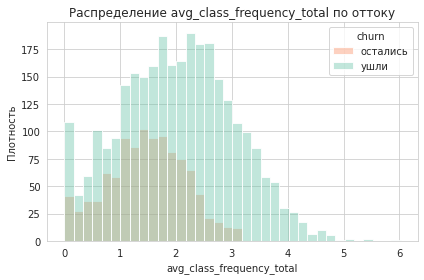

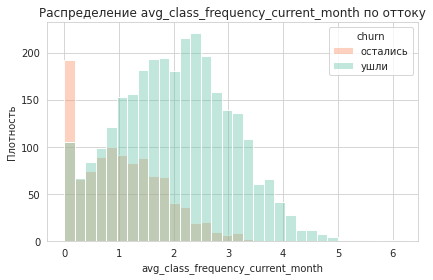

In [ ]:
# Список булевых (категориальных) признаков, кроме churn
bool_cols = [
    'gender', 'near_location', 'partner', 'promo_friends',
    'phone', 'group_visits'
]

# Список числовых признаков
num_cols = [
    'contract_period', 'age', 'avg_additional_charges_total',
    'month_to_end_contract', 'lifetime',
    'avg_class_frequency_total', 'avg_class_frequency_current_month'
]

# Настройка стиля
sns.set_style('whitegrid')

#Гистограммы для булевых признаков (столбчатые диаграммы)
for col in bool_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        x=col,
        hue='churn',
        palette='Set2'
    )
    plt.title(f'Распределение {col} по оттоку')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.legend(title='churn', labels=['остались','ушли'])
    plt.tight_layout()
    plt.show()

# Распределения для числовых признаков
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=df,
        x=col,
        hue='churn',
        alpha=0.4,
        palette='Set2'
    )
    plt.title(f'Распределение {col} по оттоку')
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend(title='churn', labels=['остались','ушли'])
    plt.tight_layout()
    plt.show()

**Меньше всего отток у:**

- сотрудники компаний партнеров
- клиенты, проживающие в районе фитнес центра
- клиенты с длительным сроком действия абонемента
- клиенты посещающие групповые занятия, при этом для не посещающих разницы в оттоке не наблюдается
- клиенты в возрасте от 28 лет

**Чаще попадают в отток:**

- клиенты по акции "приведи друга"
- клиенты со сроком действия абонемента менее 6 месяцев, в особенности краткосрочных 1 месяц
- клиенты в возрасте до 28 лет
- клиенты, которые мало тратят на дополнительные услуги
- клиенты, у которых остается малый срок до конца срока действия абонемента
- клиенты посещающие занятия реже двух раз в неделю

#### Построим матрицу корреляций

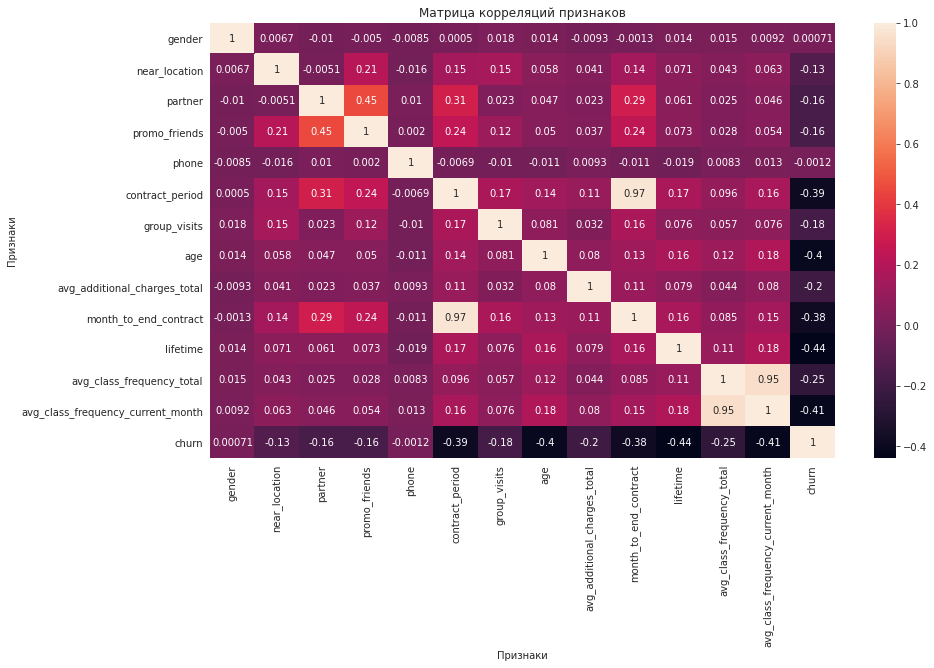

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot = True, square=False)
plt.title('Матрица корреляций признаков')
plt.xlabel('Признаки')
plt.ylabel('Признаки')
plt.show()

По **матрице корреляции** видно, что:
- явной зависимости оттока от признаков не обнаружено
- присутствует зависимость между признаками - contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_class_frequency_total, что само по себе логично и очевидно
- большинство признаков не связаны друг с другом

**Промежуточный вывод 2:**

В результате предобработки данных:
- типы данных в столбцах: 'gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn' изменены на bool, в столбце 'month_to_end_contract' на int
- пропусков и дубликатов в данных нет
- явной зависимости оттока клиентов от признаков не обнаружено
- присутствует зависимость между признаками - contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_class_frequency_total, что само по себе логично и очевидно
- большинство признаков не связаны друг с другом

### Модель прогнозирования отткока клиентов
<a id="3"></a>

#### Разобъем данные на обучающую и валидационную выборку функцией train_test_split()

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Стандартизируем данные:**

In [ ]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

#### Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом. Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.

In [ ]:
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators = 100, random_state=0)
]

def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Модель прогнозирования -", m)
    acc = accuracy_score(y_test, y_pred)
    print("Доля правильных ответов: Accuracy =",acc.round(3))
    precision = precision_score(y_test, y_pred).round(3)
    print("Точность: precision =", precision)
    recall = recall_score(y_test, y_pred).round(3)
    print("Полнота: recall =", recall, '\n')

# напишите цикл, который выводит метрики по списку моделей
for i in models:
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

Модель прогнозирования - LogisticRegression(random_state=0)
Доля правильных ответов: Accuracy = 0.922
Точность: precision = 0.854
Полнота: recall = 0.828 

Модель прогнозирования - RandomForestClassifier(random_state=0)
Доля правильных ответов: Accuracy = 0.915
Точность: precision = 0.839
Полнота: recall = 0.813 



По параметру Accuracy "Логистическая регрессия" немного выигрывает у "Случайный лес" (0,922 против 0,915), по precision тоже "Логистическая регрессия" получше (0,854 проитив 0,839) и также немного лучше по recall (0,828 против 0,813)*

По всем параметрам "Логистическая регрессия" дает результат немного лучше чем "Случайный лес"

**Промежуточный вывод 3:**
Было построено две модели:
- логистическая регрессия
- случайный лес

Обе модели показали вполне хорошие результаты, "Логистическая регрессия" - немного лучше.

### Кластеризация клиентов
<a id="4"></a>

#### Стандартизируем данные

In [ ]:
X_sc = scaler.fit_transform(X)

#### Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

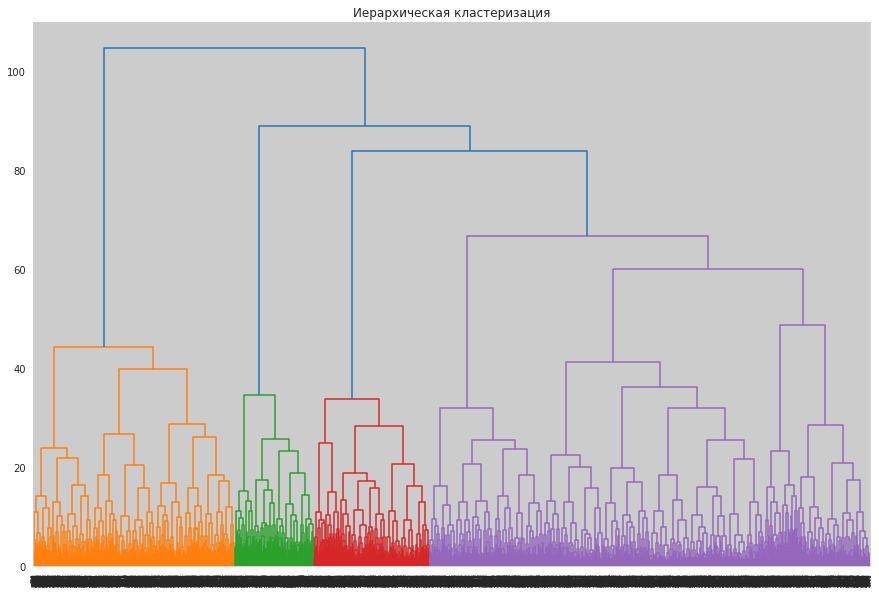

In [ ]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

**По Дендрограмме видно, что можно выделить от 4 до 6 больших кластеров клиентов. По условим проекта задаем количество кластеров равное 5.**

#### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [ ]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)

In [ ]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


**Silhouette_score = 0.14, кластеризация прошла плохо.**

#### Посмотрим на средние значения признаков для кластеров.

In [ ]:
df['cluster_km'] = labels
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,True,True,True,True,False,6,True,29,14.227470,5,3,0.020398,0.000000,False,1
1,False,True,False,False,True,12,True,31,113.202938,12,7,1.922936,1.910244,False,0
2,False,True,True,False,True,1,False,28,129.448479,1,2,1.859098,1.736502,False,3
3,False,True,True,True,True,12,True,33,62.669863,12,2,3.205633,3.357215,False,0
4,True,True,True,True,True,1,False,26,198.362265,1,3,1.113884,1.120078,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,True,True,True,False,True,12,False,33,2.406023,12,8,2.284497,2.349070,False,0
3996,False,True,False,False,True,1,True,29,68.883764,1,1,1.277168,0.292859,True,3
3997,True,True,True,True,True,12,False,28,78.250542,11,2,2.786146,2.831439,False,0
3998,False,True,True,True,True,6,False,32,61.912657,5,3,1.630108,1.596237,False,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [ ]:
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


In [ ]:
df.groupby('cluster_km')['gender'].count()

cluster_km
0    1010
1     385
2     505
3    1262
4     838
Name: gender, dtype: int64

Получили кластеры размерностью от 385 до 1262.

Самые лояльные клиенты попали в кластер 0 и кластер 4 (отток на уровне от 3 до 7 %), худшие показатели оттока в кластерах 2 и 3 (44% и 51%) соответственно.

Можно отметить, что в группу с минимальным оттоком в основном попали клиенты со средним возрастом 30 лет, проживающие рядом с фитнес центром, тратящие в среднем больше остальных на доп. услуги. Примерно половина из них посещает групповые занятия, многие (около 78% являются сотрудниками компаний - партнеров. Посещают зал эти клиенты 2 раза в неделю. Являются владельцами годовых абонементов и прозанимались 2 месяца из них.

В кластере где собралось много отточных клиентов относительно мало участников партнерских программ и акций, более молодые клиенты (около 28), клиенты с краткосрочным абонементом реже остальных посещающие зал и меньше всего тратящие на дополнительные услуги.

Полученные средние в разбивке по кластерам значения не противоречат сделанным ранее наблюдениям.

#### Построим распределения признаков для кластеров.

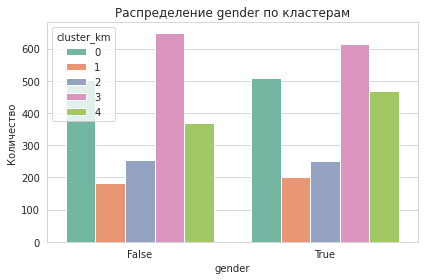

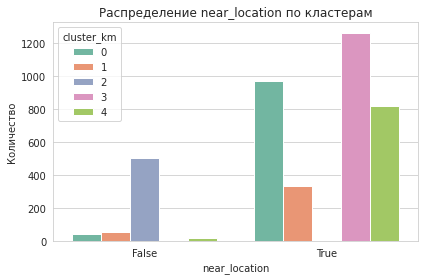

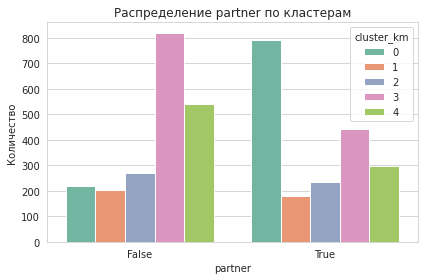

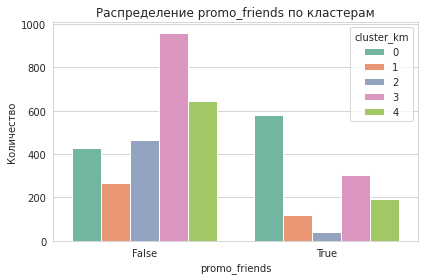

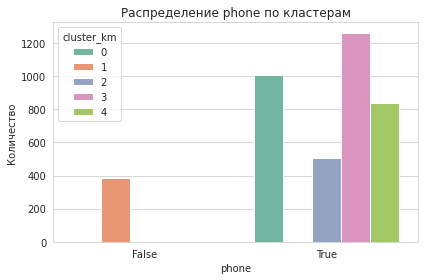

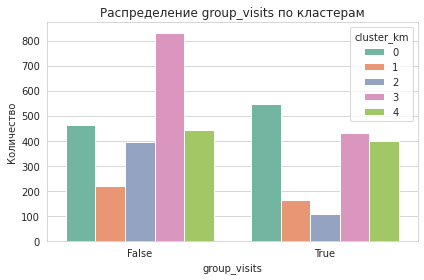

In [ ]:
for col in bool_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df,
        x=col,
        hue='cluster_km',
        palette='Set2'
    )
    plt.title(f'Распределение {col} по кластерам')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.legend(title='cluster_km')
    plt.tight_layout()
    plt.show()

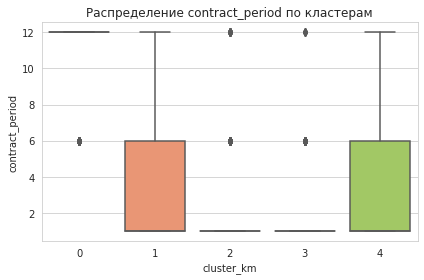

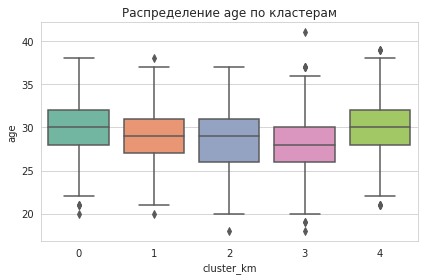

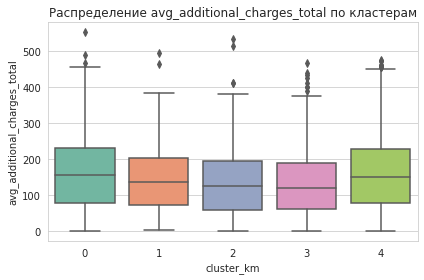

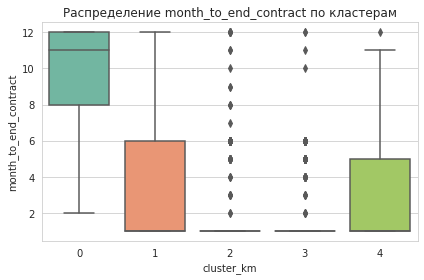

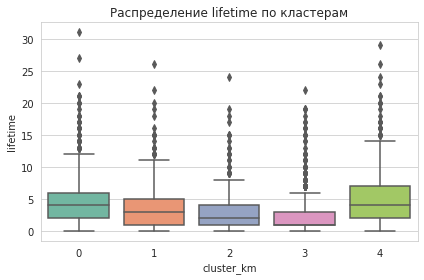

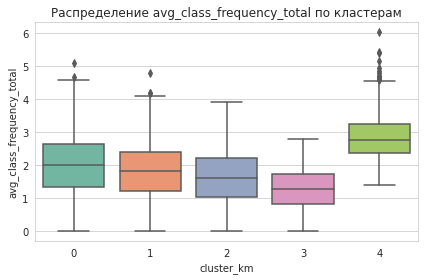

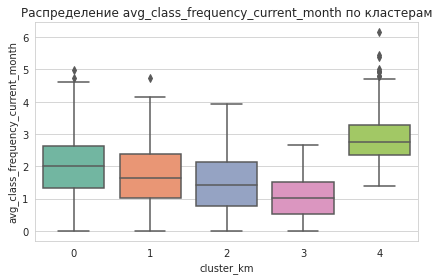

In [ ]:
# Распределения для числовых признаков
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x='cluster_km',
        y=col,
        palette='Set2'
    )
    plt.title(f'Распределение {col} по кластерам')
    plt.tight_layout()
    plt.show()

По графикам выделяется следующее:

- в основном только кластер 2 живет далеко от фитнес-центра
- кластеры 0 и 4 в основном ходят клиенты-партнеры
- в основном кластер 0 приходят по акции "приведи друга"
- контракт на 12 месяцев подписан в основном у кластера 0
- у кластера 0, естественно, больше всего времени до окончания контракта
- из графиков по возрасту и доптратам можно сказать, что чем старше посетитель, тем больше он дополнительно тратит денег
- кластер 4 чаще всех посещает спортзал
- кластер 1 не оставляет номера телефонов

#### Для каждого полученного кластера посчитаем долю оттока (методом groupby())

In [ ]:
part_churn_cluster = df.query('churn==1').groupby('cluster_km')['churn'].count() / df.query('churn==1')['churn'].count()
part_churn_cluster

cluster_km
0    0.026390
1    0.097078
2    0.211122
3    0.611687
4    0.053723
Name: churn, dtype: float64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=part_churn_cluster.index, values=part_churn_cluster.values, title='Доля оттока в кластере')]);
fig.show();

**Промежуточный вывод 4:**

Меньше всего отток в 0 кластере.
Идеальный клиент:
- проживает рядом с фитнес-центром
- сотрудник компании-партнера
- пришел по акции "приведи друга"
- длительность его абонемента 1 год
- посещает групповые занятия
- возраст 30 лет
- тратится на другие услуги центра
- еще далеко до окончания годового абонемента
- уже 5 месяцев ходит в центр
- примерно 2 раза в нределю посещает центр

### Общий вывод
<a id="5"></a>

Цель исследования достигнута.

Для достижения поставленной цели решены следующие задачи:
1. Проведена загрузка данных.

Датасет состоит из следующих столбцов:
- 'gender' — пол;
- 'near_location' — проживание или работа в районе, где находится фитнес-центр;
- 'partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'phone' — наличие контактного телефона;
- 'contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'group_visits' — факт посещения групповых занятий;
- 'age' — возраст;
- 'avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
- 'month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);
- 'avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'churn' — факт оттока в текущем месяце.

Всего в датасете 14 столбцов и 4000 строк. Наименования столбцов привели в соответствии с хорошим стилем к нижнему регистру. Типы данных в столбцах: 'gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn' стоит изменить на bool. Уже заметно, что пропусков в данных нет.

2. Проведен исследовательский анализ данных.

- типы данных в столбцах: 'gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn' изменены на bool, в столбце 'month_to_end_contract' на int
- пропусков и дубликатов в данных нет
- явной зависимости оттока клиентов от признаков не обнаружено
- присутствует зависимость между признаками - contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_class_frequency_total, что само по себе логично и очевидно
- большинство признаков не связаны друг с другом

3. Построены модели прогнозирования оттока клиентов

Было построено две модели прогнозирования оттока клиентов:
- логистическая регрессия
- случайный лес

Обе модели показали вполне хорошие результаты, "Логистическая регрессия" - немного лучше.

4. Проведена кластеризация клиентов.

Меньше всего отток клиентов в 0 кластере. Портрет идеального клиента:
- проживает рядом с фитнес-центром
- сотрудник компании-партнера
- пришел по акции "приведи друга"
- длительность его абонемента 1 год
- посещает групповые занятия
- возраст 30 лет
- тратится на другие услуги центра
- еще далеко до окончания годового абонемента
- уже 5 месяцев ходит в центр
- примерно 2 раза в нределю посещает центр

5. Написан общий вывод.

Рекомендации:
- продолжить сотрудничать с компаниями-партнерами, развитие отношений с другими компаниями
- продолжить проведение акции "приведи друга"
- проводить рекламу в районе, где находится центр
- развитие групповых тренировок
- разнообразить дополнительные услуги
- установление доступных цен на длительные абонементы
- для вовлечение более молодых людей в центр, необходимо рассмотреть возможность предоставления скидок студентам, скидок в утренние или обеденные часы посещения фитнес-центра.
